# Домашнее задание к лекции «Корреляция и корреляционный анализ»

1. Возьмите датасет Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

Дополнительно будет выложен в ЛК.
В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

2 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков
3 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/water.csv')
df.head(10)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15
7,8,South,Bournemouth,1299,78
8,9,North,Bradford,1637,10
9,10,South,Brighton,1359,84


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

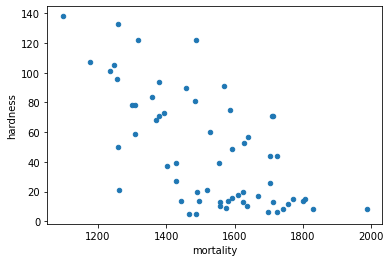

In [3]:
# визуализируем взаимосвязь смертности и жёсткости воды
df.plot(kind='scatter', x='mortality', y='hardness')

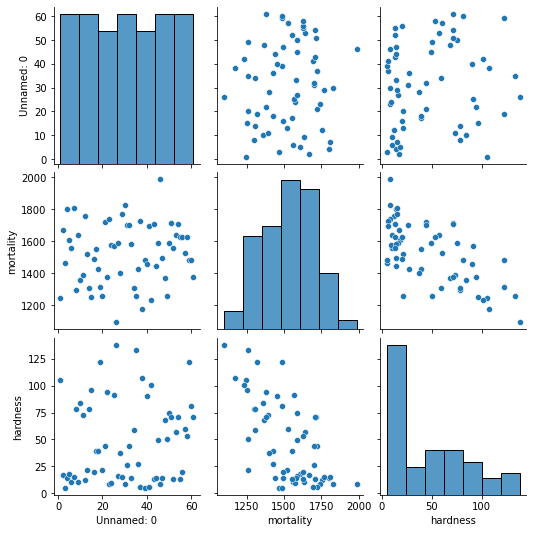

In [4]:
sns.pairplot(df)

In [5]:
# считаем коэф. корреляции Пирсона
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [6]:
# считаем коэф. корреляции Спирмана
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [7]:
# считаем коэф. корреляции Кенделла
df[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


<AxesSubplot:>

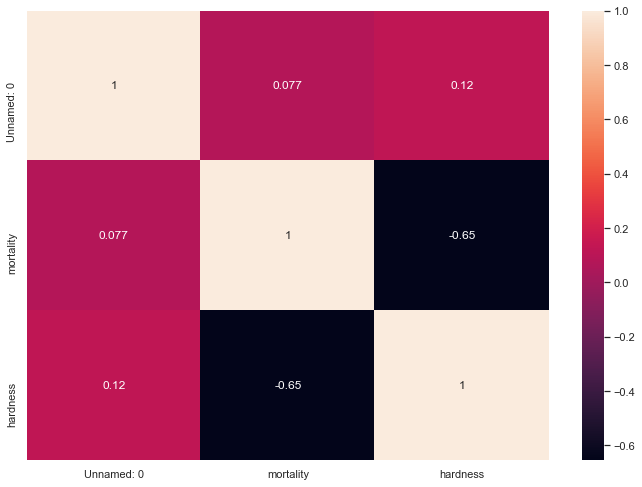

In [8]:
# посмотрим на тепловую карту
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr(), annot=True)

In [9]:
# Построим модель линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
X = df[['mortality']]
y = df['hardness']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
X_train.shape

(42, 1)

In [13]:
y_train.shape

(42,)

In [14]:
# Обучение модели и подборка оптимальных коэффициентов
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
model.coef_

array([-0.12670202])

In [16]:
model.intercept_

239.3678426140957

In [17]:
y_pred = model.predict(X_test)
y_pred

array([81.3704298 , 41.96610311, 49.94833006, 23.72101293, 73.76830889,
       33.4770681 , 79.85000562, 38.29174467, 46.9074817 , 24.48122503,
       73.51490486, 51.21535021, 42.34620915, 11.30421546, 22.83409883,
       58.43736507, 31.95664392, 10.41730135, 82.76415197])

In [18]:
# X_test['y_pred'] = y_pred
# X_test['y_test'] = y_test
# X_test

In [19]:
# коэффициент детерминации
model.score(X_test, y_test) 


0.4948982822876836

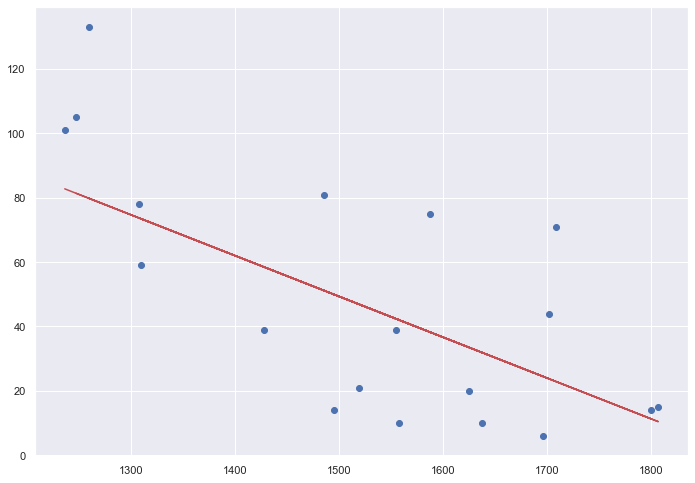

In [20]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [22]:
# Посмотрим через statmodel
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [25]:
# Добавим константу
X_const = sm.add_constant(X_train)
X_const

,const,mortality
4,1.0,1609
44,1.0,1591
19,1.0,1260
47,1.0,1369
52,1.0,1640
25,1.0,1096
57,1.0,1627
15,1.0,1491
58,1.0,1486
27,1.0,1402


In [26]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           7.83e-06
Time:                        11:19:44   Log-Likelihood:                -201.74
No. Observations:                  42   AIC:                             407.5
Df Residuals:                      40   BIC:                             411.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        239.3678     37.934      6.310      0.0

In [27]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const        239.367843
mortality     -0.126702
dtype: float64
R2:  0.396789010091228


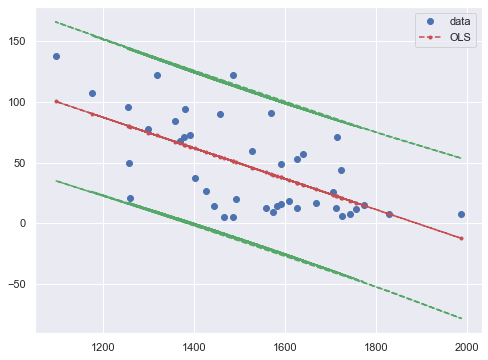

In [28]:
# Посмотрим на прогноз и доверительный интервал
prstd, iv_l, iv_u = wls_prediction_std(results) 
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

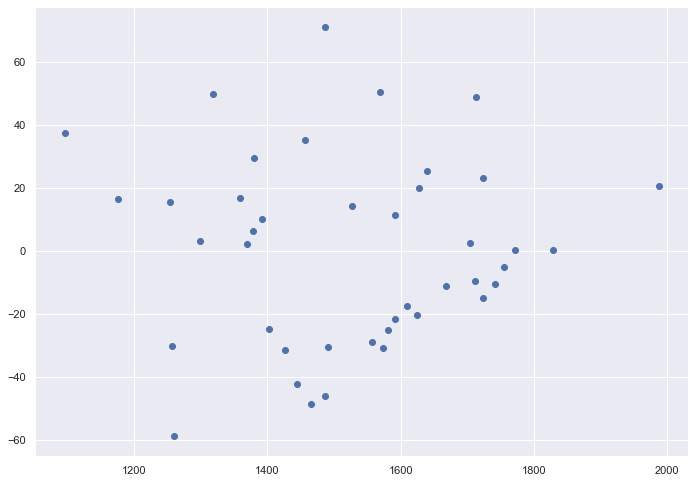

In [29]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([3., 1., 9., 5., 6., 7., 5., 2., 3., 1.]),
 array([-58.7233036 , -45.75983806, -32.79637252, -19.83290698,
         -6.86944144,   6.0940241 ,  19.05748964,  32.02095518,
         44.98442072,  57.94788627,  70.91135181]),
 <BarContainer object of 10 artists>)

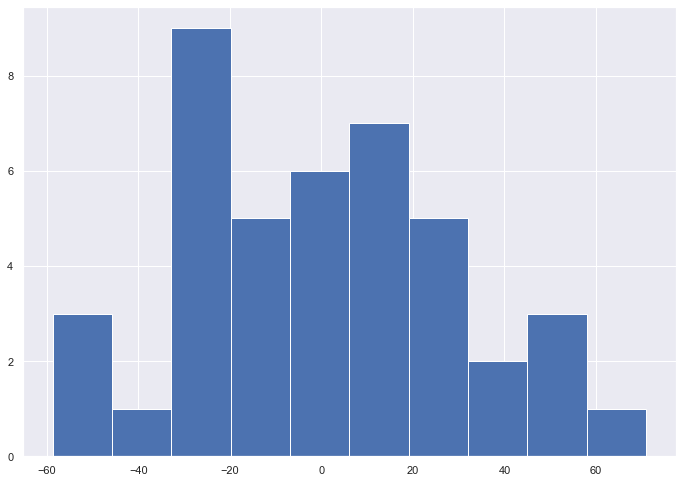

In [30]:
plt.hist(results.resid)

In [32]:
# Делим данные на две группы
south_df = df[df['location'].str.contains("South")]
south_df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


In [33]:
north_df = df[df['location'].str.contains("North")]
north_df.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

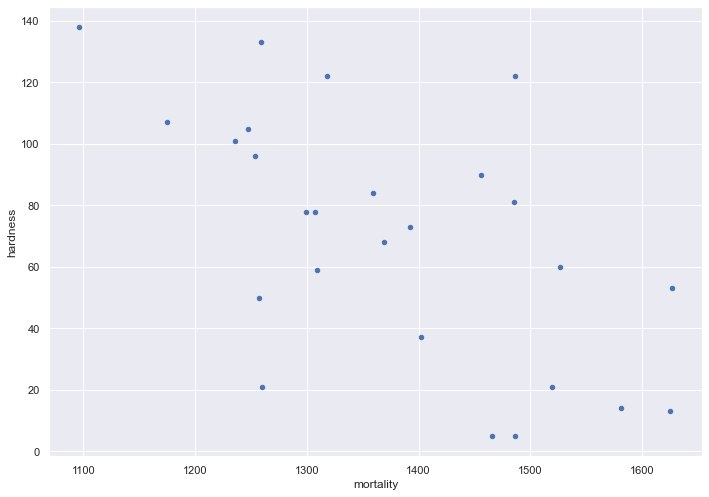

In [34]:
south_df.plot(kind='scatter', x='mortality', y='hardness')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

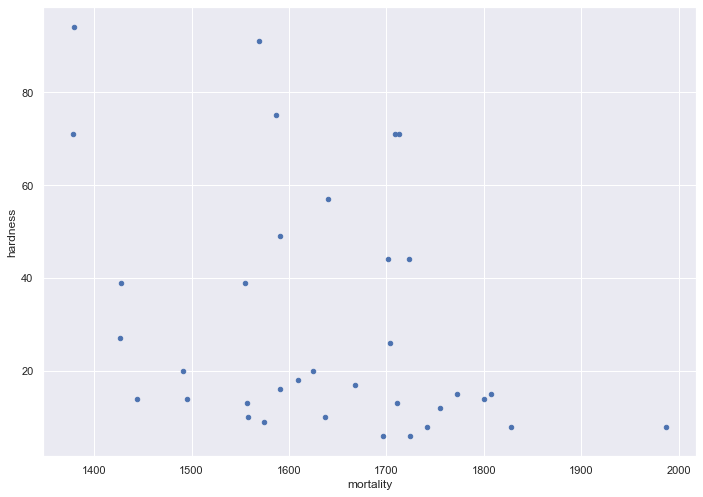

In [35]:
north_df.plot(kind='scatter', x='mortality', y='hardness')


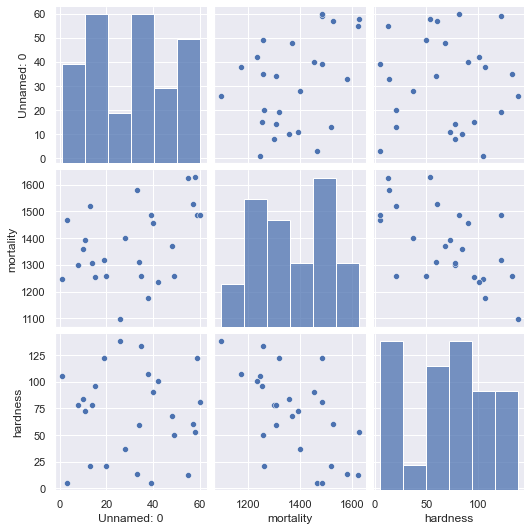

In [36]:
sns.pairplot(south_df)

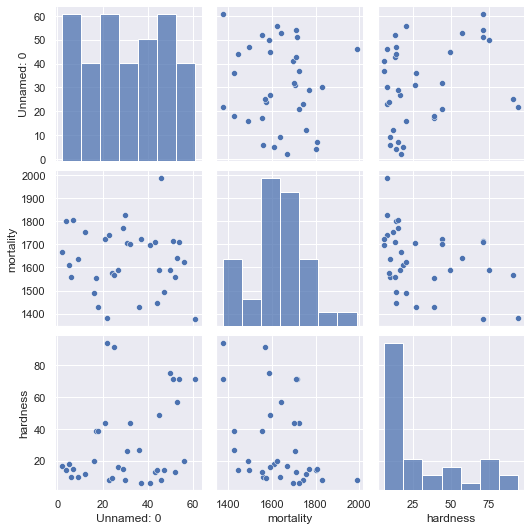

In [37]:
sns.pairplot(north_df)

In [38]:
# коэф. корреляции Пирсона
south_df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [39]:
north_df[['mortality', 'hardness']].corr()


,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [40]:
# коэф. корреляции Спирмана
south_df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [41]:
north_df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


<AxesSubplot:>

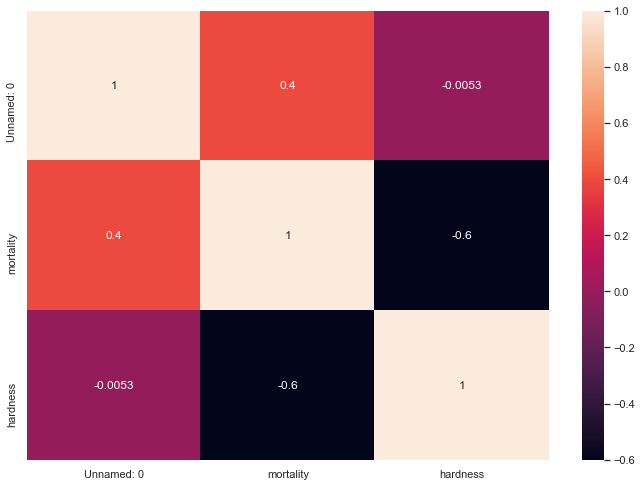

In [42]:
# тепловая карта
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(south_df.corr(), annot=True)

<AxesSubplot:>

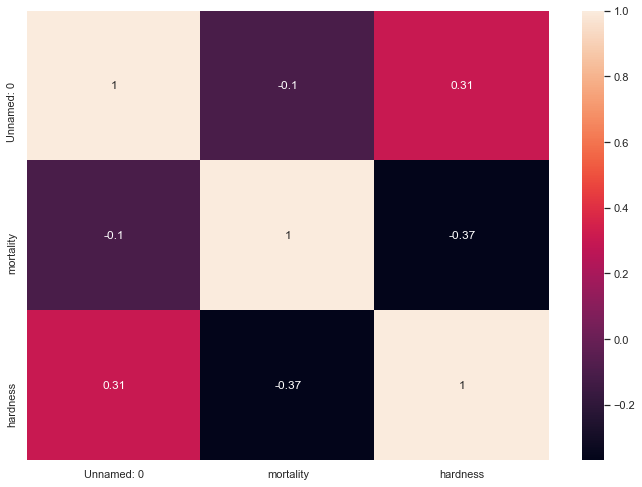

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(north_df.corr(), annot=True)

In [44]:
# Модель линейной регрессии для группы South
X_south = south_df[['mortality']]
y_south = south_df['hardness']
X_south_train, X_south_test, y_south_train, y_south_test = train_test_split(X_south, y_south, test_size=0.30, random_state=42)
print(X_south_train.shape)
print(y_south_train.shape)

# обучение
model_south = LinearRegression()
model_south.fit(X_south_train, y_south_train)

print(model_south.coef_)
print(model_south.intercept_)

y_south_pred = model_south.predict(X_south_test)
print(y_south_pred)

# коэффициент детерминации
model_south.score(X_south_test, y_south_test) 

(18, 1)
(18,)
[-0.18112812]
324.1190746235987
[85.39221138 54.96268708 98.25230796 54.96268708 70.17744923 95.89764238
 87.02236446 58.58524949]


-0.052266157944838465

In [45]:
# statmodel для группы South
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X_south_train, X_south_test, y_south_train, y_south_test = train_test_split(X_south, y_south, test_size=0.30, random_state=42)
X_south_const = sm.add_constant(X_south_train)
print(X_south_const)

model_south = sm.OLS(y_south_train, X_south_const)
results_south = model_south.fit()
print(results_south.summary())

print('Parameters: ', results_south.params)
print('R2: ', results_south.rsquared)

    const  mortality
57    1.0       1627
12    1.0       1519
7     1.0       1299
32    1.0       1581
37    1.0       1175
9     1.0       1359
10    1.0       1392
54    1.0       1625
39    1.0       1456
56    1.0       1527
41    1.0       1236
59    1.0       1485
48    1.0       1257
14    1.0       1254
25    1.0       1096
34    1.0       1259
47    1.0       1369
13    1.0       1307
                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.00
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           7.30e-05
Time:                        11:46:58   Log-Likelihood:                -80.286
No. Observations:                  18   AIC:                             164.6
Df Residuals:                      16   BIC:    

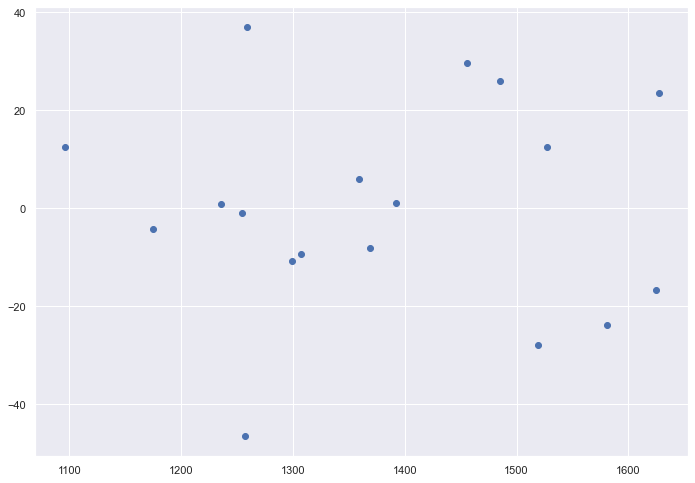

In [48]:
# остатки для группы South
plt.scatter(X_south_const.iloc[:, 1], results_south.resid)

(array([1., 0., 2., 1., 3., 4., 1., 2., 2., 2.]),
 array([-46.44102675, -38.10480112, -29.7685755 , -21.43234987,
        -13.09612425,  -4.75989863,   3.576327  ,  11.91255262,
         20.24877825,  28.58500387,  36.92122949]),
 <BarContainer object of 10 artists>)

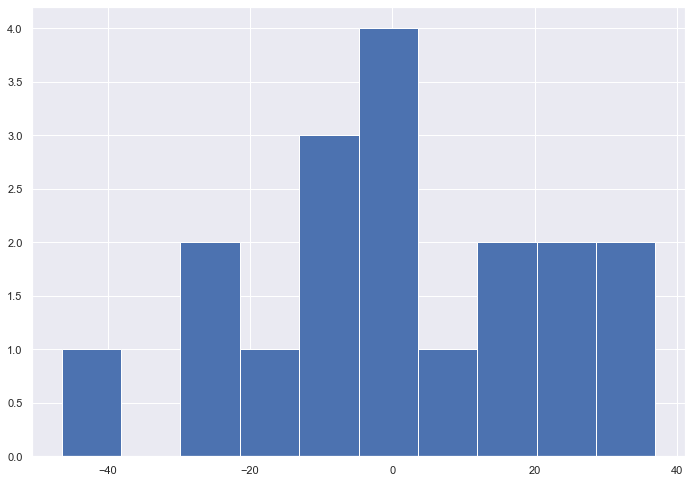

In [49]:
plt.hist(results_south.resid)


In [50]:
# Модель линейной регрессии для группы North
X_north = north_df[['mortality']]
y_north = north_df['hardness']
X_north_train, X_north_test, y_north_train, y_north_test = train_test_split(X_north, y_north, test_size=0.30, random_state=42)
print(X_north_train.shape)
print(y_north_train.shape)

# обучение
model_north = LinearRegression()
model_north.fit(X_north_train, y_north_train)

print(model_north.coef_)
print(model_north.intercept_)

y_north_pred = model_north.predict(X_north_test)
print(y_north_pred)

# коэффициент детерминации
model_north.score(X_north_test, y_north_test) 

(24, 1)
(24,)
[-0.09774218]
191.72797679112006
[-2.48573411 37.88178607 50.58826942 23.22045913 36.22016902 24.29562311
 25.37078708 21.4610999  39.73888749 18.52883451 52.1521443 ]


-0.34863672627416675

In [51]:
# statmodel для группы North
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X_north_train, X_north_test, y_north_train, y_north_test = train_test_split(X_north, y_north, test_size=0.30, random_state=42)
X_north_const = sm.add_constant(X_north_train)
print(X_north_const)

model_north = sm.OLS(y_north_train, X_north_const)
results_north = model_north.fit()
print(results_north.summary())

print('Parameters: ', results_north.params)
print('R2: ', results_north.rsquared)

    const  mortality
55    1.0       1625
1     1.0       1668
6     1.0       1807
29    1.0       1828
46    1.0       1495
8     1.0       1637
21    1.0       1379
3     1.0       1800
4     1.0       1609
53    1.0       1709
5     1.0       1558
51    1.0       1557
42    1.0       1711
52    1.0       1640
20    1.0       1723
40    1.0       1696
30    1.0       1704
44    1.0       1591
11    1.0       1755
35    1.0       1427
60    1.0       1378
15    1.0       1491
24    1.0       1569
49    1.0       1587
                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Tue, 06 Apr 2021   Prob (F-statistic):             0.0316
Time:                        11:59:53   Log-Likelihood:                -111.11
N

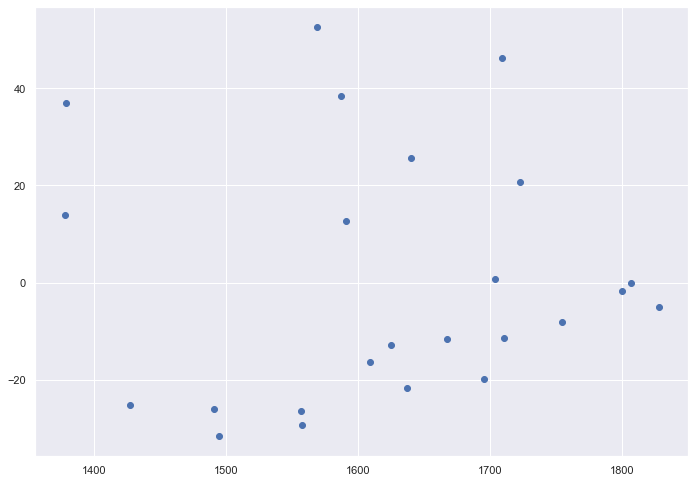

In [52]:
# остатки для группы North
plt.scatter(X_north_const.iloc[:, 1], results_north.resid)

(array([5., 3., 4., 4., 0., 2., 2., 0., 2., 2.]),
 array([-31.60341826, -23.18012614, -14.75683401,  -6.33354188,
          2.08975025,  10.51304238,  18.93633451,  27.35962664,
         35.78291877,  44.2062109 ,  52.62950303]),
 <BarContainer object of 10 artists>)

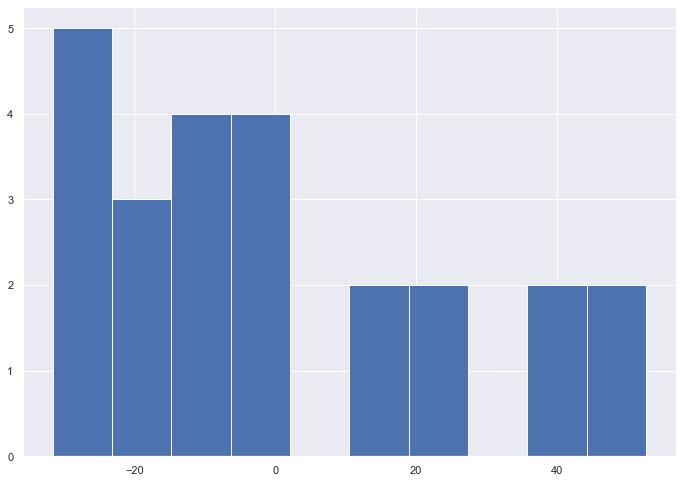

In [53]:
plt.hist(results_north.resid)